<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Pj%232_Deep%20Learning%20(with%205%20class%20classify).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Plot the learning curve of the DT model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [2]:
# Load data
dataset = pd.read_csv("Dataset_P2.csv")
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1).values

In [ ]:
# Oversample using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Initialize the classifier
clf = DecisionTreeClassifier()

In [ ]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                                                        X=X_train,
                                                        y=y_train,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

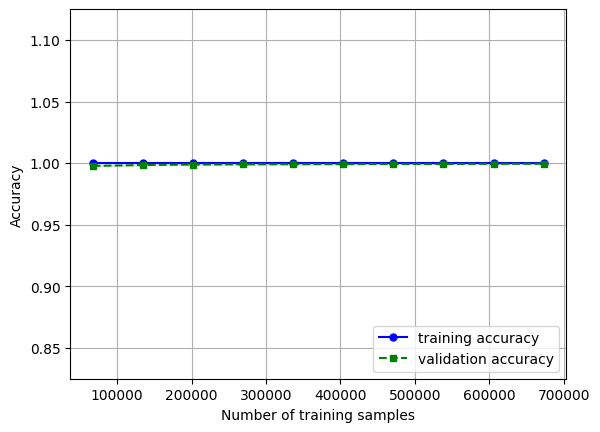

In [ ]:
# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.825, 1.125])
plt.show()

## **Deep Learning**

### **Data Processing**

In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("Dataset_P2.csv")
dataset.shape
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [6]:
dataset["Class"].unique()

array([0, 2, 4, 3, 1])

### **Data Balancing**

In [7]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [9]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.0100000e+05 5.0000000e+01 1.0000000e+00 ... 1.3008535e+02
  0.0000000e+00 2.4694000e+00]
 [1.0100100e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.0000000e+00 6.9570000e-02]
 [1.0100200e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.8980000e-02]
 ...
 [2.0109800e+05 1.0030000e+03 0.0000000e+00 ... 1.3926438e+02
  1.0000000e+00 9.4370000e-02]
 [2.0109900e+05 1.0030000e+03 0.0000000e+00 ... 1.5827492e+02
  3.0000000e+00 1.6047000e-01]
 [2.0204100e+05 1.0250000e+03 0.0000000e+00 ... 1.1500407e+02
  0.0000000e+00 1.0132500e+00]]
[0 0 0 ... 0 0 0]


In [10]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 3: 14596, 1: 10049, 4: 6638, 2: 3312})


### **SMOTE**

In [11]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 2: 340066, 4: 340066, 3: 340066, 1: 340066})


In [12]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='gist_yarg')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [14]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score

### **Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Build the deep learning model 
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Confusion Matrix of Deep Neural Network


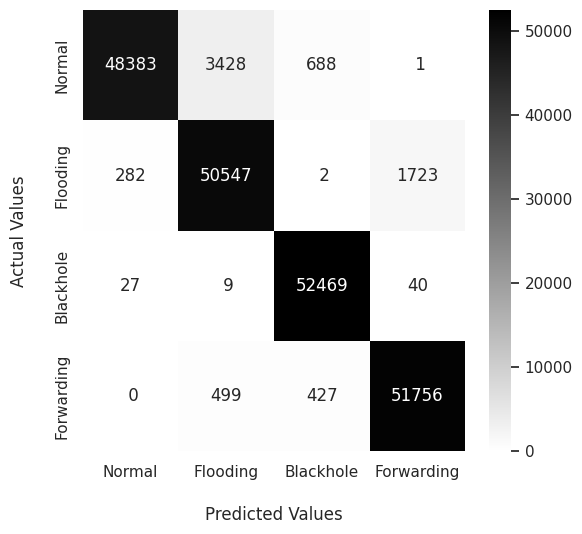

In [ ]:
print("Confusion Matrix of Deep Neural Network") 
conf_mat(y_test, predicted_classes)

### **Multi-Layer Perceptron (MLP)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/10
26286/26286 [==============================] - 44s 2ms/step - loss: 0.5246 - accuracy: 0.8276 - val_loss: 0.2639 - val_accuracy: 0.8934
Epoch 2/10
26286/26286 [==============================] - 44s 2ms/step - loss: 0.2127 - accuracy: 0.9173 - val_loss: 0.1812 - val_accuracy: 0.9317
Epoch 3/10
26286/26286 [==============================] - 38s 1ms/step - loss: 0.1647 - accuracy: 0.9398 - val_loss: 0.1801 - val_accuracy: 0.9379
Epoch 4/10
26286/26286 [==============================] - 38s 1ms/step - loss: 0.1468 - accuracy: 0.9475 - val_loss: 0.2108 - val_accuracy: 0.9167
Epoch 5/10
26286/26286 [==============================] - 43s 2ms/step - loss: 0.1338 - accuracy: 0.9537 - val_loss: 0.1381 - val_accuracy: 0.9605
Epoch 6/10
26286/26286 [==============================] - 38s 1ms/step - loss: 0.1163 - accuracy: 0.9614 - val_loss: 0.1639 - val_accuracy: 0.9543
Epoch 7/10
26286/26286 [==============================] - 38s 1ms/step - loss: 0.1174 - accuracy: 0.9599 - val_loss: 0

Confusion Matrix of Multi-Layer Perceptron (MLP)


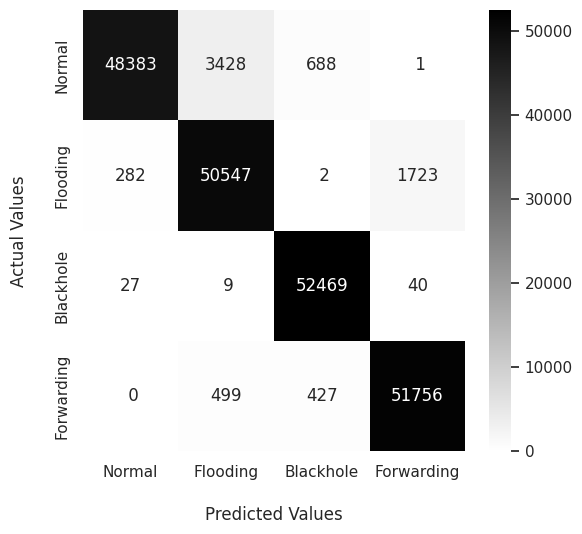

In [ ]:
print("Confusion Matrix of Multi-Layer Perceptron (MLP)") 
conf_mat(y_test, predicted_classes)

### **Recurrent Network (RNN)**

In [ ]:
##from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
##from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load dataset
##dataset = pd.read_csv("dataset.csv")

# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

# One-hot encode y
y = to_categorical(y)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))

Epoch 1/10
26286/26286 [==============================] - 64s 2ms/step - loss: 0.8627 - accuracy: 0.6647 - val_loss: 0.6399 - val_accuracy: 0.7751
Epoch 2/10
26286/26286 [==============================] - 59s 2ms/step - loss: 0.7681 - accuracy: 0.6898 - val_loss: 0.6297 - val_accuracy: 0.7733
Epoch 3/10
26286/26286 [==============================] - 55s 2ms/step - loss: 0.7662 - accuracy: 0.6911 - val_loss: 0.6609 - val_accuracy: 0.7551
Epoch 4/10
26286/26286 [==============================] - 58s 2ms/step - loss: 0.7659 - accuracy: 0.6920 - val_loss: 0.6273 - val_accuracy: 0.7813
Epoch 5/10
26286/26286 [==============================] - 60s 2ms/step - loss: 0.7654 - accuracy: 0.6926 - val_loss: 0.6343 - val_accuracy: 0.7711
Epoch 6/10
26286/26286 [==============================] - 56s 2ms/step - loss: 0.7644 - accuracy: 0.6933 - val_loss: 0.6302 - val_accuracy: 0.7911
Epoch 7/10
26286/26286 [==============================] - 55s 2ms/step - loss: 0.7646 - accuracy: 0.6936 - val_loss: 0

Confusion Matrix of Recurrent Network (RNN)


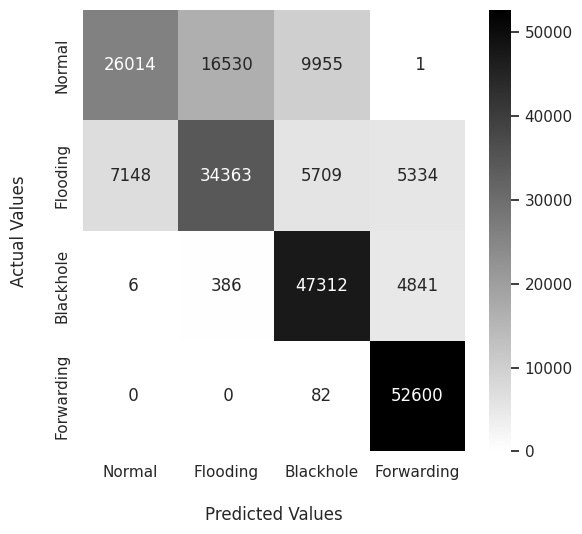

In [ ]:
print("Confusion Matrix of Recurrent Network (RNN)") 
conf_mat(y_true, y_pred)

### **Convolutional Neural Network (CNN)**

In [30]:
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

In [20]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

# One-hot encode y
y = to_categorical(y)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [21]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data for input to Conv2D
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

### **CNN for 5 class classifications**

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv("Dataset_P2.csv")

# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

# One-hot encode y
y = to_categorical(y)

In [26]:
# Upsample the minority classes using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data for input to Conv2D
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

In [28]:
# Define the model architecture
model = Sequential()
model.add(Reshape((1, X_train.shape[2], 1), input_shape=(1, X_train.shape[2])))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/10
42509/42509 [==============================] - 364s 9ms/step - loss: 2.5175 - accuracy: 0.1998 - val_loss: 1.6097 - val_accuracy: 0.2001
Epoch 2/10
42509/42509 [==============================] - 365s 9ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2002
Epoch 3/10
42509/42509 [==============================] - 342s 8ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6096 - val_accuracy: 0.1994
Epoch 4/10
42509/42509 [==============================] - 349s 8ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2010
Epoch 5/10
42509/42509 [==============================] - 342s 8ms/step - loss: 1.6095 - accuracy: 0.2003 - val_loss: 1.6096 - val_accuracy: 0.1994
Epoch 6/10
42509/42509 [==============================] - 357s 8ms/step - loss: 1.6095 - accuracy: 0.1999 - val_loss: 1.6095 - val_accuracy: 0.2002
Epoch 7/10
42509/42509 [==============================] - 344s 8ms/step - loss: 1.6095 - accuracy: 0.1998 - val_

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67745
           1       0.00      0.00      0.00     68042
           2       0.00      0.00      0.00     68370
           3       0.20      1.00      0.33     68087
           4       0.00      0.00      0.00     67822

    accuracy                           0.20    340066
   macro avg       0.04      0.20      0.07    340066
weighted avg       0.04      0.20      0.07    340066



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Load the dataset
dataset = pd.read_csv("Dataset_P2.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.2, random_state=42)

# Reshape the input data to 4D tensor
X_train = X_train.values.reshape(X_train.shape, 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape, 28, 28, 1)

# Reshape data for input to Conv2D
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

# Convert the target variable to categorical
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

TypeError: ignored

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))

**CNN for 4 class classifications**

In [ ]:
##from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
##from keras.utils import to_categorical
##from sklearn.model_selection import train_test_split
##from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load dataset
##dataset = pd.read_csv("dataset.csv")

# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

# One-hot encode y
y = to_categorical(y)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data for input to Conv2D
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

model = Sequential()
model.add(Reshape((1, X_train.shape[2], 1), input_shape=(1, X_train.shape[2])))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))

Epoch 1/10
26286/26286 [==============================] - 156s 6ms/step - loss: 0.2981 - accuracy: 0.8798 - val_loss: 0.4344 - val_accuracy: 0.8551
Epoch 2/10
26286/26286 [==============================] - 137s 5ms/step - loss: 0.2024 - accuracy: 0.9227 - val_loss: 0.1434 - val_accuracy: 0.9456
Epoch 3/10
26286/26286 [==============================] - 136s 5ms/step - loss: 0.1834 - accuracy: 0.9310 - val_loss: 0.1464 - val_accuracy: 0.9472
Epoch 4/10
26286/26286 [==============================] - 138s 5ms/step - loss: 0.1655 - accuracy: 0.9395 - val_loss: 0.1160 - val_accuracy: 0.9583
Epoch 5/10
26286/26286 [==============================] - 135s 5ms/step - loss: 0.1531 - accuracy: 0.9452 - val_loss: 0.1181 - val_accuracy: 0.9567
Epoch 6/10
26286/26286 [==============================] - 135s 5ms/step - loss: 0.1488 - accuracy: 0.9474 - val_loss: 0.1034 - val_accuracy: 0.9629
Epoch 7/10
26286/26286 [==============================] - 125s 5ms/step - loss: 0.1564 - accuracy: 0.9429 - val_

Confusion Matrix of Convolutional Neural Network (CNN)


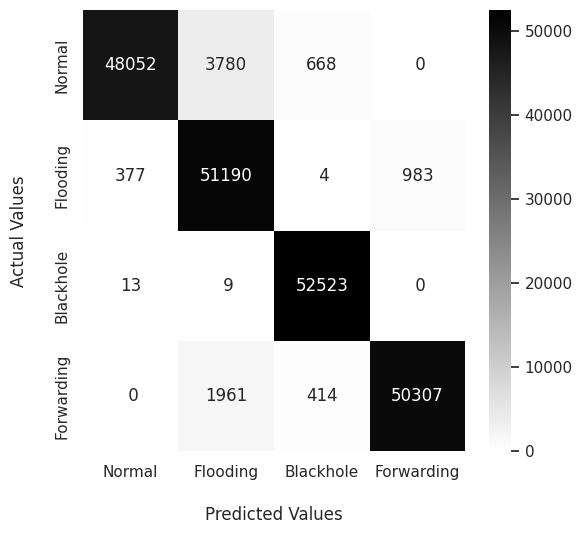

In [ ]:
print("Confusion Matrix of Convolutional Neural Network (CNN)") 
conf_mat(y_true, y_pred)

### **Long short-term memory (LSTM)**

In [ ]:
##from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
##from keras.utils import to_categorical
##from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Load dataset
##dataset = pd.read_csv("dataset.csv")

# Encode class labels
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
num_classes = len(le.classes_)

# Split dataset into features and target
X = dataset.drop('Class', axis=1).values
y = to_categorical(dataset['Class'].values, num_classes=num_classes)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Decode class labels
predicted_classes = le.inverse_transform(predicted_classes)

# Confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test.argmax(axis=1), predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/10
26286/26286 [==============================] - 91s 3ms/step - loss: 0.4496 - accuracy: 0.8195 - val_loss: 0.4185 - val_accuracy: 0.8350
Epoch 2/10
26286/26286 [==============================] - 88s 3ms/step - loss: 0.3958 - accuracy: 0.8468 - val_loss: 0.3541 - val_accuracy: 0.8626
Epoch 3/10
26286/26286 [==============================] - 90s 3ms/step - loss: 0.3614 - accuracy: 0.8569 - val_loss: 0.3230 - val_accuracy: 0.8729
Epoch 4/10
26286/26286 [==============================] - 90s 3ms/step - loss: 0.3438 - accuracy: 0.8621 - val_loss: 0.3775 - val_accuracy: 0.8551
Epoch 5/10
26286/26286 [==============================] - 92s 3ms/step - loss: 0.3376 - accuracy: 0.8642 - val_loss: 0.3084 - val_accuracy: 0.8823
Epoch 6/10
26286/26286 [==============================] - 89s 3ms/step - loss: 0.3348 - accuracy: 0.8651 - val_loss: 0.3208 - val_accuracy: 0.8636
Epoch 7/10
26286/26286 [==============================] - 89s 3ms/step - loss: 0.3294 - accuracy: 0.8676 - val_loss: 0

Confusion Matrix of Long short-term memory (LSTM)


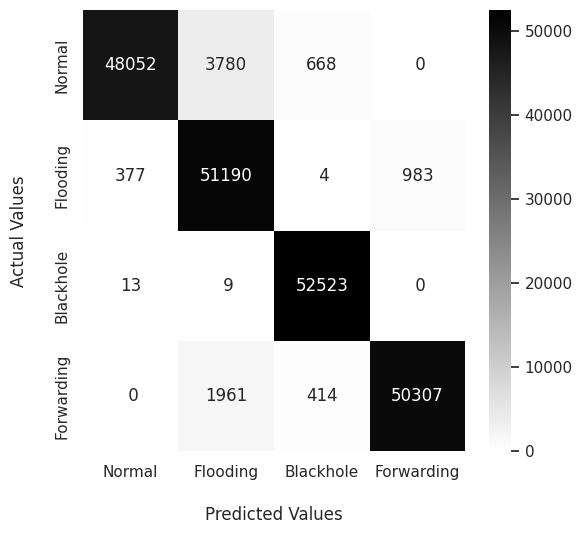

In [ ]:
print("Confusion Matrix of Long short-term memory (LSTM)") 
conf_mat(y_true, y_pred)

### **Bidirectional LSTM (BiLSTM)**

In [ ]:
##from sklearn.model_selection import train_test_split
##from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
##from keras.utils import to_categorical

In [ ]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
X = dataset.drop(['Class'], axis=1).values
y = dataset['Class'].values

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, validation_data=(np.expand_dims(X_test, axis=2), y_test))

# Evaluate the model on the test set 
score = model.evaluate(np.expand_dims(X_test, axis=2), y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(np.expand_dims(X_test, axis=2))
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(np.argmax(y_test, axis=1), predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/10
26286/26286 [==============================] - 314s 12ms/step - loss: 0.2474 - accuracy: 0.9007 - val_loss: 0.1273 - val_accuracy: 0.9534
Epoch 2/10
26286/26286 [==============================] - 339s 13ms/step - loss: 0.1161 - accuracy: 0.9584 - val_loss: 0.1065 - val_accuracy: 0.9515
Epoch 3/10
26286/26286 [==============================] - 323s 12ms/step - loss: 0.0909 - accuracy: 0.9685 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 4/10
26286/26286 [==============================] - 322s 12ms/step - loss: 0.0805 - accuracy: 0.9728 - val_loss: 0.0782 - val_accuracy: 0.9733
Epoch 5/10
26286/26286 [==============================] - 320s 12ms/step - loss: 0.0729 - accuracy: 0.9761 - val_loss: 0.0634 - val_accuracy: 0.9803
Epoch 6/10
26286/26286 [==============================] - 322s 12ms/step - loss: 0.0663 - accuracy: 0.9787 - val_loss: 0.0732 - val_accuracy: 0.9654
Epoch 7/10
26286/26286 [==============================] - 322s 12ms/step - loss: 0.0617 - accuracy: 0.9802

Confusion Matrix of Bidirectional LSTM (BiLSTM)


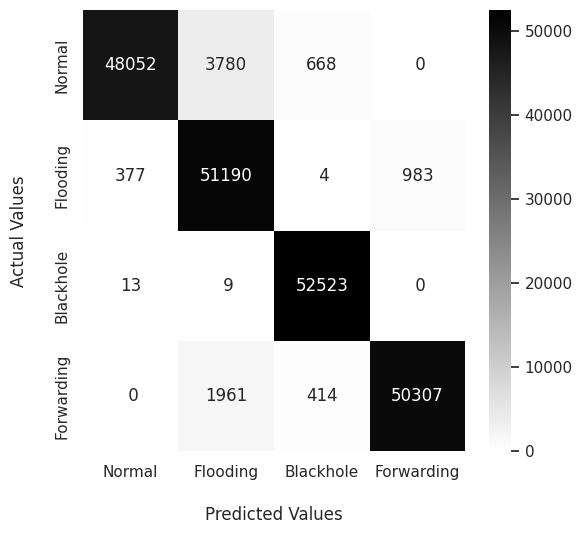

In [ ]:
print("Confusion Matrix of Bidirectional LSTM (BiLSTM)") 
conf_mat(y_true, y_pred)